In [43]:
import pandas as pd
import numpy as np
import gzip
import csv
import json

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime
import re
from nltk import FreqDist
from nltk.collocations import *
import nltk

In [44]:
df_1 = pd.read_csv('C:/Users/Munir/Desktop/ADS Masters SYR/Fall 2020/Natural Language Processing/Project/reviews.csv.gz', compression='gzip',
                   error_bad_lines=False)
#check shape
print("The dataset has {} rows and {} columns.".format(*df_1.shape))

#check duplicates
print("It contains {} duplicates.".format(df_1.duplicated().sum()))

The dataset has 1003064 rows and 6 columns.
It contains 0 duplicates.


In [45]:
df_1.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [46]:
df_2 = pd.read_csv('C:/Users/Munir/Desktop/ADS Masters SYR/Fall 2020/Natural Language Processing/Project/listings.csv.gz', compression='gzip',
                   error_bad_lines=False)

In [47]:
df_2.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20201005145859,2020-10-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,10.0,10.0,9.0,NaN,f,2,2,0,0,0.36
1,3831,https://www.airbnb.com/rooms/3831,20201005145859,2020-10-09,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,9.0,9.0,9.0,NaN,f,1,1,0,0,4.82
2,5121,https://www.airbnb.com/rooms/5121,20201005145859,2020-10-09,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.36
3,5136,https://www.airbnb.com/rooms/5136,20201005145859,2020-10-08,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/a3f7ace8-e7a9...,7378,https://www.airbnb.com/users/show/7378,...,10.0,8.0,10.0,NaN,f,1,1,0,0,0.01
4,5178,https://www.airbnb.com/rooms/5178,20201005145859,2020-10-07,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,9.0,10.0,9.0,NaN,f,1,0,1,0,3.40


In [48]:
# merging full df_1 + add only specific columns from df_2
df = pd.merge(df_1, df_2[['neighbourhood_group_cleansed', 'host_id', 'latitude',
                          'longitude', 'number_of_reviews', 'id', 'property_type']], 
              left_on='listing_id', right_on='id', how='left')

df.rename(columns = {'id_x':'id', 'neighbourhood_group_cleansed':'neighbourhood_group'}, inplace=True)
df.drop(['id_y'], axis=1, inplace=True)

In [49]:
df.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...,Manhattan,2845,40.75362,-73.98377,48,Entire apartment
1,2595,19176,2009-12-05,53267,Cate,Great experience.,Manhattan,2845,40.75362,-73.98377,48,Entire apartment
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...,Manhattan,2845,40.75362,-73.98377,48,Entire apartment


In [50]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 1003064 rows and 12 columns.


In [51]:
df.isna().sum()

listing_id               0
id                       0
date                     0
reviewer_id              0
reviewer_name            8
comments               681
neighbourhood_group      0
host_id                  0
latitude                 0
longitude                0
number_of_reviews        0
property_type            0
dtype: int64

In [52]:
df.dropna(inplace=True)
df.isna().sum()

listing_id             0
id                     0
date                   0
reviewer_id            0
reviewer_name          0
comments               0
neighbourhood_group    0
host_id                0
latitude               0
longitude              0
number_of_reviews      0
property_type          0
dtype: int64

In [53]:
df.shape

(1002375, 12)

In [54]:
# we use Python's langdetect 
from langdetect import detect

In [55]:
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [56]:
%%time
df['language'] = df['comments'].apply(language_detection)

Wall time: 1h 2min 2s


In [57]:
df.language.value_counts().head(10)

en       884371
fr        34444
es        32181
de        11461
it         5788
pt         4943
zh-cn      3751
ko         3491
ro         3294
nl         2688
Name: language, dtype: int64

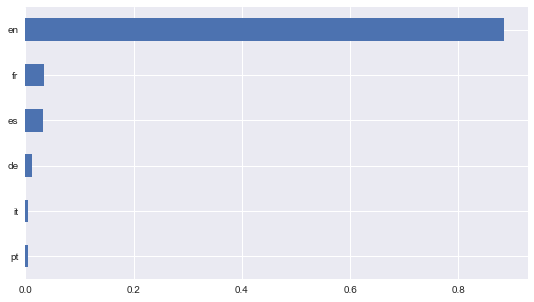

In [58]:
# visualizing the comments' languages a) quick and dirty
ax = df.language.value_counts(normalize=True).head(6).sort_values().plot(kind='barh', figsize=(9,5));

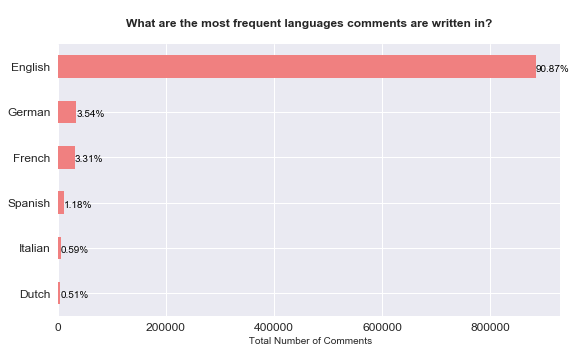

In [59]:
# visualizing the comments' languages b) neat and clean
ax = df.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'German', 'French', 'Spanish', 'Italian', 'Dutch'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()

In [60]:
# splitting the dataframes in language related sub-dataframes
df_eng = df[(df['language']=='en')]
df_de  = df[(df['language']=='de')]
df_fr  = df[(df['language']=='fr')]

In [61]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [62]:
#wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

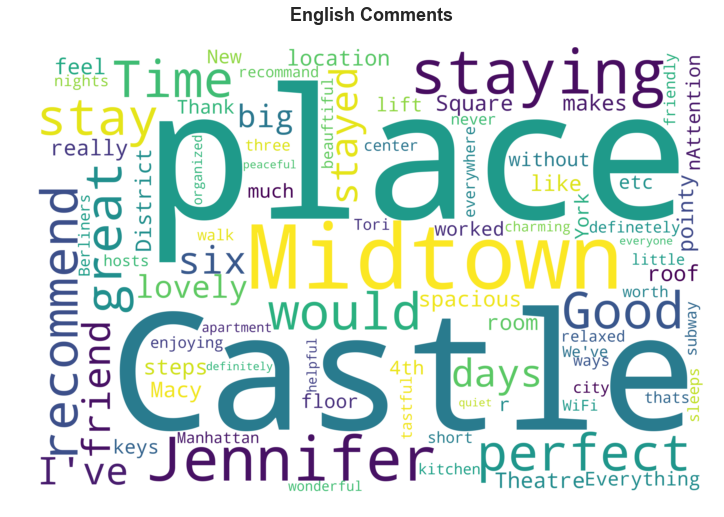

In [63]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="white", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_eng.comments.values))

plot_wordcloud(wordcloud, 'English')

In [64]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [18]:
from nltk.corpus import sentence_polarity
import random

In [65]:
# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()

In [99]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [100]:
ndist = FreqDist(df_eng.comments)
nitems = ndist.most_common(30)
for item in nitems:
    print (item[0], '\t', item[1])

Great place 	 976
The host canceled this reservation the day before arrival. This is an automated posting. 	 957
The host canceled this reservation 2 days before arrival. This is an automated posting. 	 816
The host canceled this reservation 3 days before arrival. This is an automated posting. 	 735
Great place! 	 727
The host canceled this reservation 4 days before arrival. This is an automated posting. 	 571
Great 	 559
The host canceled this reservation 8 days before arrival. This is an automated posting. 	 464
The host canceled this reservation 6 days before arrival. This is an automated posting. 	 460
The host canceled this reservation 7 days before arrival. This is an automated posting. 	 459
Great location! 	 454
The host canceled this reservation 5 days before arrival. This is an automated posting. 	 449
Great stay 	 446
Great place to stay 	 442
Great location 	 414
The host canceled this reservation 9 days before arrival. This is an automated posting. 	 399
Great stay! 	 383


In [68]:
#get bigram measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [138]:
#taking a sample of large dataset
df_eng.sample(frac=0.001, replace=True, random_state=1)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,language
145157,1506985,605246537,2020-02-14,236703381,진성,It was a fantastic experience.\nI could learn ...,Manhattan,8049757,40.80108,-73.94346,67,Entire townhouse,en
562291,15846039,627452211,2020-06-02,108550675,Yauheniya,Had a great time,Brooklyn,46382885,40.66011,-73.93202,144,Private room in apartment,en
538429,15043817,556037096,2019-10-28,112505878,Renzo,I’m glad to stay here,Queens,84607966,40.73850,-73.91993,189,Private room in apartment,en
900430,32113235,554512960,2019-10-26,180480008,Vincent,We have not seen the host but he has been avai...,Manhattan,229149668,40.74928,-73.99633,53,Entire apartment,en
561722,15843671,191237040,2017-09-06,12404403,Ethan,Just like the ad says,Queens,102624893,40.75957,-73.82206,88,Private room in condominium,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70569,489965,151975449,2017-05-14,129340341,Nur Adilah,Clara's house is great,Manhattan,2423067,40.79313,-73.93493,47,Private room in apartment,en
647564,19054163,539520730,2019-10-01,52779779,Max,We really enjoyed staying at Linda’s apartment...,Brooklyn,133004690,40.68633,-73.93972,161,Entire apartment,en
644101,18924273,215976641,2017-12-02,35029460,Matthew,"Solid room, a bit of a walk from the subway",Brooklyn,97018938,40.63895,-73.90868,94,Private room in house,en
100264,786685,269518135,2018-05-27,60185972,Lee,The garden level flat in this brownstone comes...,Manhattan,4147380,40.82294,-73.94999,86,Entire apartment,en


In [126]:
#get ngram measures
ngrams = list(nltk.bigrams(df_eng2.comments))
print(df_eng[:51])
print(ngrams[:50])

    listing_id         id        date  reviewer_id reviewer_name  \
2         2595      19760  2009-12-10        38960         Anita   
3         2595      34320  2010-04-09        71130       Kai-Uwe   
4         2595      46312  2010-05-25       117113        Alicia   
5         2595    1238204  2012-05-07      1783688        Sergey   
6         2595    1293632  2012-05-17      1870771          Loïc   
7         2595    2022498  2012-08-18      2124102       Melanie   
8         2595    4682989  2013-05-20       496053          Eric   
9         2595   13193832  2014-05-21     13685934        Gerald   
10        2595   15515108  2014-07-10     10781357       Richard   
11        2595   20372242  2014-09-28      4212558        Carson   
12        2595   20937971  2014-10-07     13460520       Michael   
14        2595   28794060  2015-03-30     27436102        Kellie   
15        2595   30430122  2015-04-21      6429364         Sonya   
16        2595   32532759  2015-05-19     121465

In [127]:
# define features that include words as before 
# add the most frequent significant bigrams
# this function takes the list of words in a document as an argument and returns a feature dictionary
# it depends on the variables word_features and bigram_features
def bigram_document_features(df_eng2, word_features, bigram_features):
    document_words = set(document)
    document_bigrams = nltk.bigrams(document)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    for bigram in bigram_features:
        features['B_{}_{}'.format(bigram[0], bigram[1])] = (bigram in document_bigrams)    
    return features

In [129]:
# number of features for document 0
print(len(bigram_featuresets[0][0].keys()))

2000


In [130]:
def document_features(document, word_features):
	document_words = set(document)
	features = {}
	for word in word_features:
		features['V_{}'.format(word)] = (word in document_words)
	return features

In [139]:
finder3 = BigramCollocationFinder.from_words(df_eng2.comments)
scored = finder3.score_ngrams(bigram_measures.pmi)
for bscore in scored[:100]:
    print (bscore)


(('(Traducción en Español abajo)\nOur staying at Joyce house was perfect! We stayed for one month and we want to come back. She is very kind, respectful and adorable. Her house is comfortable. We cooked every day, there are a lots of supplies. The private bathroom had all what we needed. And the bedroom is amazing. The station is near, only 3 minutes by walk. We took the express line every day (only 20 minutes from the apartment to the Empire State Building). The neighbourhood is safe even at night and there are a lots of store (starbucks, groceries, wallgreens, popeyes, etc). This was our best staying in airbnb. Joyce thank you very much!!!\n\n(En Español)\nNuestra estancia en la casa de Joyce fue perfecta!  Nos quedamos un mes y queremos volver.  Ella es muy amable, respetuosa y adorable.  Su casa es cómoda.  Cocinamos todos los días, hay un montón de suministros.  El baño privado tenía todo lo que necesitábamos.  Y el dormitorio es increíble.  La estación está cerca, a solo 3 minuto

In [133]:
bigram_features = finder3.nbest(bigram_measures.chi_sq, 500)
print(bigram_features[:50])

[('(Traducción en Español abajo)\nOur staying at Joyce house was perfect! We stayed for one month and we want to come back. She is very kind, respectful and adorable. Her house is comfortable. We cooked every day, there are a lots of supplies. The private bathroom had all what we needed. And the bedroom is amazing. The station is near, only 3 minutes by walk. We took the express line every day (only 20 minutes from the apartment to the Empire State Building). The neighbourhood is safe even at night and there are a lots of store (starbucks, groceries, wallgreens, popeyes, etc). This was our best staying in airbnb. Joyce thank you very much!!!\n\n(En Español)\nNuestra estancia en la casa de Joyce fue perfecta!  Nos quedamos un mes y queremos volver.  Ella es muy amable, respetuosa y adorable.  Su casa es cómoda.  Cocinamos todos los días, hay un montón de suministros.  El baño privado tenía todo lo que necesitábamos.  Y el dormitorio es increíble.  La estación está cerca, a solo 3 minuto

In [134]:
def bigram_document_features(df_eng2, word_features, bigram_features):
    document_words = set(df_eng.comments)
    document_bigrams = nltk.bigrams(df_eng)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    for bigram in bigram_features:
        features['B_{}_{}'.format(bigram[0], bigram[1])] = (bigram in document_bigrams)    
    return features

In [137]:
# train a classifier and report accuracy
train_set, test_set = bigram_featuresets[1000:], bigram_featuresets[:1000]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.709

In [141]:
num_folds = 5
cross_validation_accuracy(num_folds, bigram_featuresets)

Each fold size: 2132
0 0.725609756097561
1 0.7410881801125704
2 0.75093808630394
3 0.7471857410881801
4 0.7410881801125704
mean accuracy 0.7411819887429644


In [142]:
goldlist = []
predictedlist = []
for (features, label) in test_set:
    	goldlist.append(label)
    	predictedlist.append(classifier.classify(features))

In [144]:
print(goldlist[:10])
print(predictedlist[:10])

['neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg']
['neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos']


In [149]:
# call the function with our data
eval_measures(goldlist, predictedlist)

In [136]:
finder3.apply_freq_filter(5)
scored = finder3.score_ngrams(bigram_measures.pmi)
for bscore in scored[:30]:
    print (bscore)


In [26]:
print_sentiment_scores("John loved walking down the beach")

John loved walking down the beach------- {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.5994}


In [28]:
print_sentiment_scores("Time square was really close")
print_sentiment_scores("I loved the walk to Time Square!")
print_sentiment_scores("NYC is the best!!")
print_sentiment_scores("I hated travelling to New York")

Time square was really close------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I loved the walk to Time Square!-------- {'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'compound': 0.636}
NYC is the best!!----------------------- {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.6988}
I hated travelling to New York---------- {'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.6369}


In [29]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [32]:
negative_score("Time Square was fantastic but I hated the traffic!")

0.423

In [33]:
%%time

df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)

Wall time: 23min 7s


In [34]:
# write the dataframe to a csv file in order to avoid the long runtime
#df_eng.to_csv('data/sentimentData/sentiment_df_eng', index=False)
#df = pd.read_csv('data/sentimentData/sentiment_df_eng')
df = df_eng

In [35]:
df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...,Manhattan,2845,40.75362,-73.98377,48,Entire apartment,en,0.016,0.793,0.192,0.9248
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en...",Manhattan,2845,40.75362,-73.98377,48,Entire apartment,en,0.000,0.808,0.192,0.9229


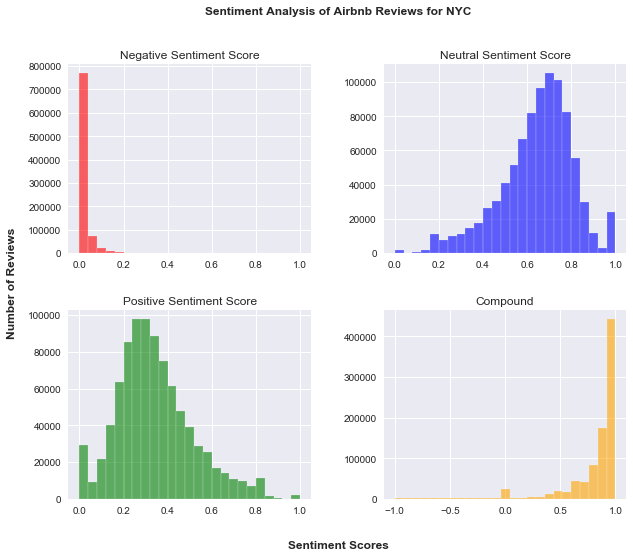

In [122]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='red', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='blue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='green', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='orange', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for NYC\n\n', fontsize=12, fontweight='bold');

In [38]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    884397.000000
mean          0.819835
std           0.266974
min          -0.999000
5%            0.246680
10%           0.568600
20%           0.750100
30%           0.839500
40%           0.888300
50%           0.920000
60%           0.941800
70%           0.958200
80%           0.971200
90%           0.982600
max           0.999700
Name: sentiment_compound, dtype: float64

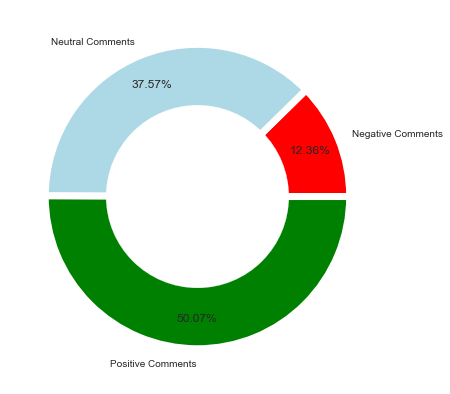

In [125]:
# assign the data

names = ['Negative Comments', 'Neutral Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['red', 'lightblue', 'green'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [40]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [41]:
# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

In [42]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

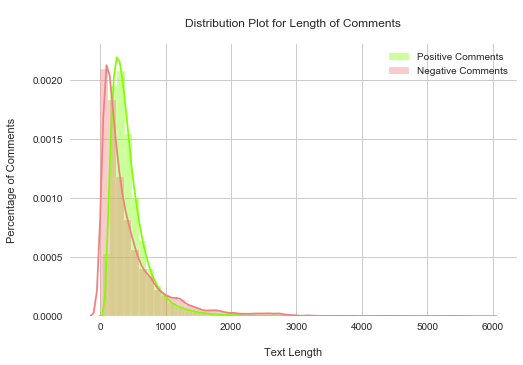

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

In [44]:
# read some positive comments
pos_comments[10:15]

['Jennifer was super friendly and helpful. Great host with an amazing studio apartment right in the middle of NYC. Everything is walking distance! The Empire State Building, Times Square, and New York library were all around the corner or less than 15 minutes walk. Best location ever and great relaxing place to stay.\n\nQuick note: Apartment is located on the 4th floor with no elevator so make sure you don’t have very heavy luggage. In any case it’s a good workout :)',
 "Jennifer's space was such a lovely experience. PreCheckin and checkin was detailed and seamless, she made it easier on us and answered all questions so quickly. The space itself is such a unique, clear & zen energy- we loved it. Not to mention it was very clean & close to everything! Definitely be prepared for the 4flight workout (we appreciated that)! We enjoyed the space and location & would recommend this to anyone coming to explore the city!!",
 'Jennifer’s place is beautiful, cozy and very well located. We were ab

In [45]:
# read some negative comments
neg_comments[10:15]

["We stayed at Shun's place for a week in july. His flat is EXTREMELY well located (5minutes walking from Times square and central park). It's also very close to the metro (didn't have to make any transfer in the subway during the week). Shun is nice, very discreet. Privacy garanteed. \r\nThe bad point of being so well located is that it's very noisy, even during the night. The room was ok but not perfectly clean (dirty dishes, earings in the sheets, dust, ...). \r\nWe do still recommand this place because of the price, and also of the location. ",
 "We've already stayed five times with airbnb and this was definitely the worst!\r\nThe bedroom smells, the bed and the pillows are horribly uncomfortable, it's loud.\r\nThe bathroom is a bit dirty, it smells of mildew and on the shower curtain there is a lot of mildew!!\r\nThe host let you feel unwanted,he doesn't want you to use the kitchen and isn't helpful at all.\r\nThe location isn't bad for that money, but if you can afford more don't

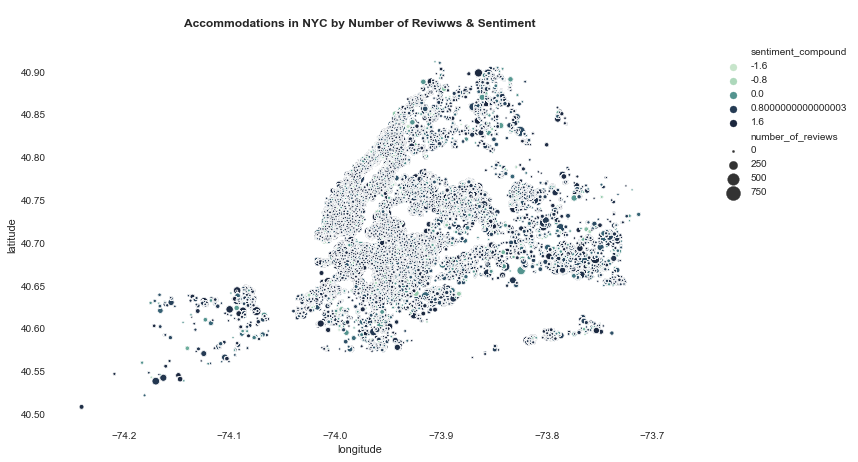

In [47]:
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
fig, ax = plt.subplots(figsize=(11,7))

ax = sns.scatterplot(x="longitude", y="latitude", size='number_of_reviews', sizes=(5, 200),
                     hue='sentiment_compound', palette=cmap,  data=df)
ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('\nAccommodations in NYC by Number of Reviwws & Sentiment\n', fontsize=12, fontweight='bold')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

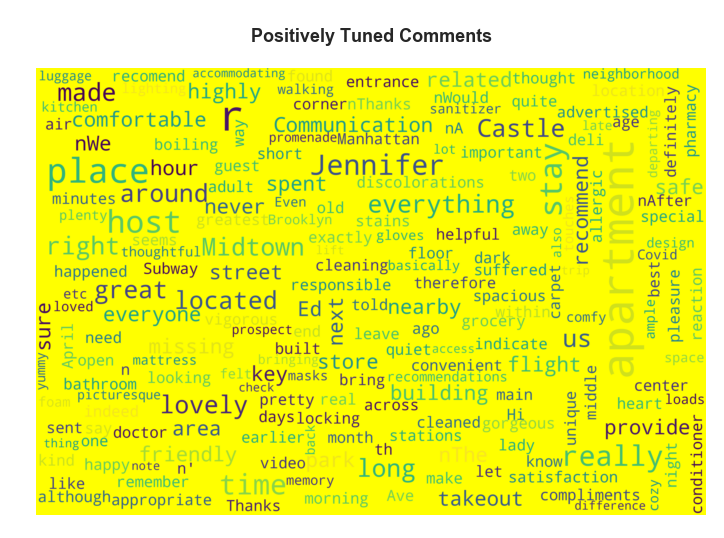

In [134]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="yellow",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

In [52]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

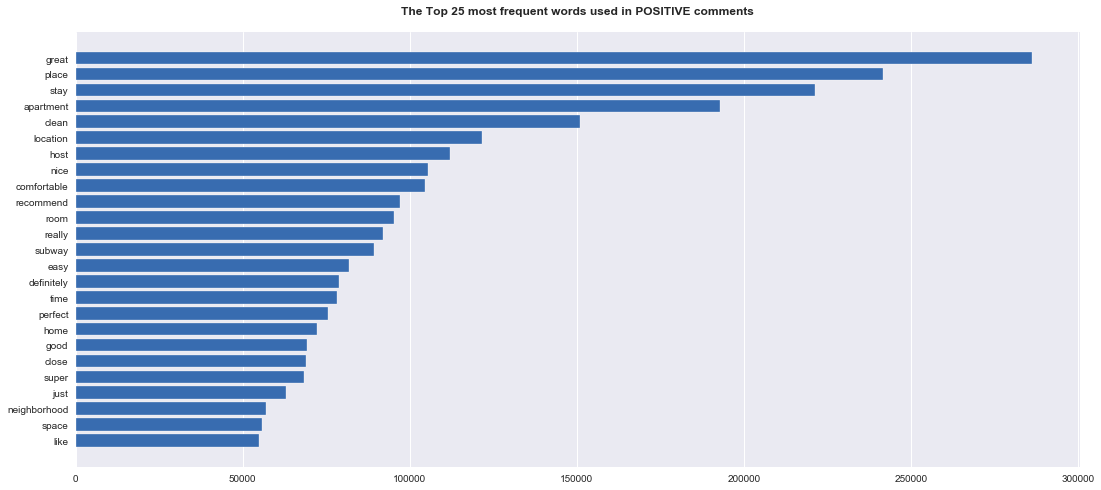

In [132]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('accent')
plt.figure(figsize=(18,8))
plt.title('The Top 20 most frequent words used in POSITIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 20 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=20)
visualizer.fit(docs)
visualizer.poof;

In [54]:
# importing libraries
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [55]:
# prepare the preprocessing
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [56]:
# removing stopwords, punctuations and normalizing the corpus
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(comment).split() for comment in pos_comments]

In [58]:
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

import pickle 
# uncomment the code if working locally
#pickle.dump(corpus, open('data/sentimentData/corpus.pkl', 'wb'))
#dictionary.save('data/sentimentData/dictionary.gensim')

In [61]:
import gensim

# let LDA find 3 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=2)



topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.022*"home" + 0.019*"place" + 0.018*"u" + 0.013*"host"')
(1, '0.017*"room" + 0.011*"bed" + 0.009*"bathroom" + 0.008*"place"')
(2, '0.026*"place" + 0.021*"subway" + 0.020*"great" + 0.016*"minute"')
(3, '0.055*"great" + 0.046*"place" + 0.039*"stay" + 0.031*"clean"')
(4, '0.019*"apartment" + 0.017*"restaurant" + 0.013*"park" + 0.011*"great"')


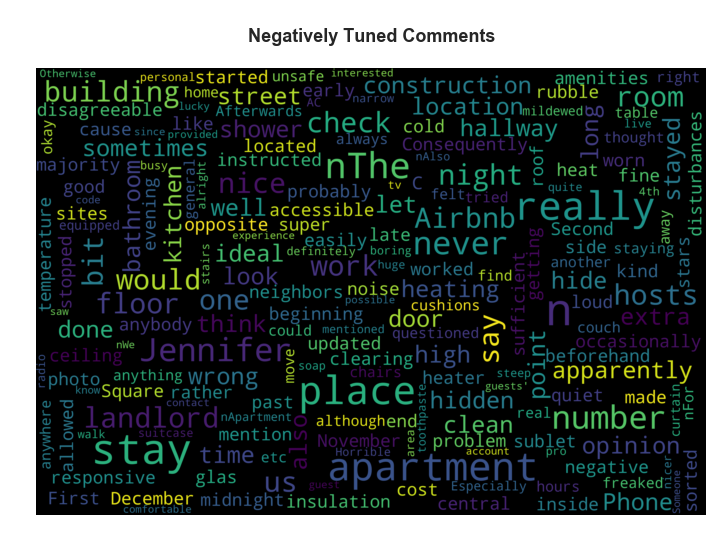

In [135]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="black",
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nNegatively Tuned')

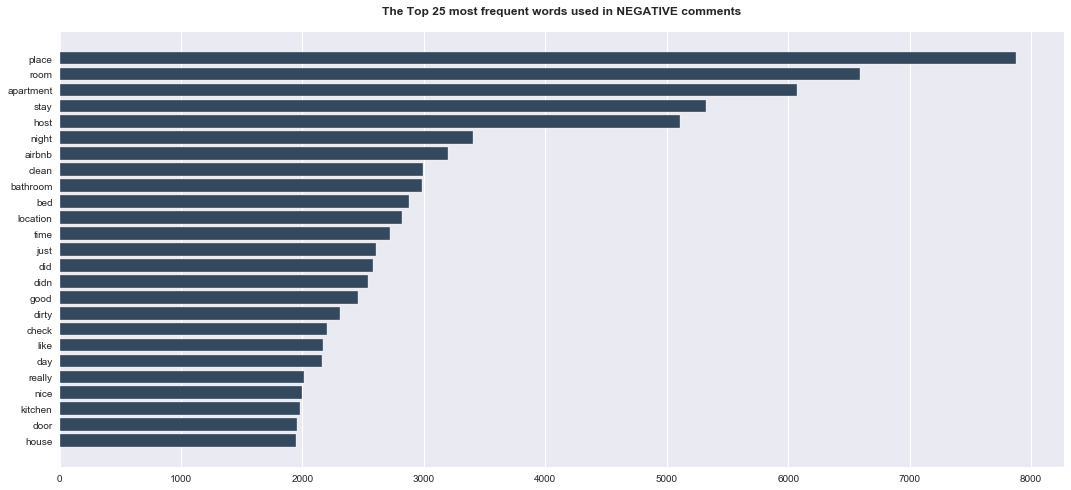

In [137]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('flatui')
plt.figure(figsize=(18,8))
plt.title('The Top 25 most frequent words used in NEGATIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 25 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=25)
visualizer.fit(docs)
visualizer.poof;

In [138]:
# calling the cleaning function we defined earlier
doc_clean = [clean(comment).split() for comment in neg_comments]

In [139]:
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

In [144]:
# topic modeling
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=2)
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.013*"kitchen" + 0.013*"air" + 0.011*"dirty" + 0.011*"bnb" + 0.010*"floor" + 0.010*"apartment"')
(1, '0.022*"room" + 0.020*"place" + 0.012*"apartment" + 0.011*"night" + 0.011*"nice" + 0.010*"bathroom"')
(2, '0.030*"m" + 0.008*"florence" + 0.006*"die" + 0.006*"e" + 0.004*"und" + 0.004*"individual"')
(3, '0.020*"host" + 0.013*"never" + 0.012*"door" + 0.012*"airbnb" + 0.012*"place" + 0.011*"stay"')
(4, '0.034*"place" + 0.028*"la" + 0.020*"stay" + 0.013*"parking" + 0.011*"night" + 0.011*"complaint"')
